# Case Study: Women in Engineering 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
majors = pd.read_csv("recent-grads.csv")
majors.head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
#Check for null values
majors[pd.isnull(majors).any(axis=1)]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [4]:
missing_percentage = 1/173*100
missing_percentage

0.5780346820809248

Seems like the food science major is missing some data. However, when less than 5% of data is missing we can drop the rows, so we can disregard the food science major for this analysis.

# Part 1: Undergrad Students

In [5]:
categories = majors.groupby("Major_category").size().to_frame().reset_index()
categories = categories.rename(columns={0: "Number of Majors"})
categories.head(5)

,Major_category,Number of Majors
0,Agriculture & Natural Resources,10
1,Arts,8
2,Biology & Life Science,14
3,Business,13
4,Communications & Journalism,4


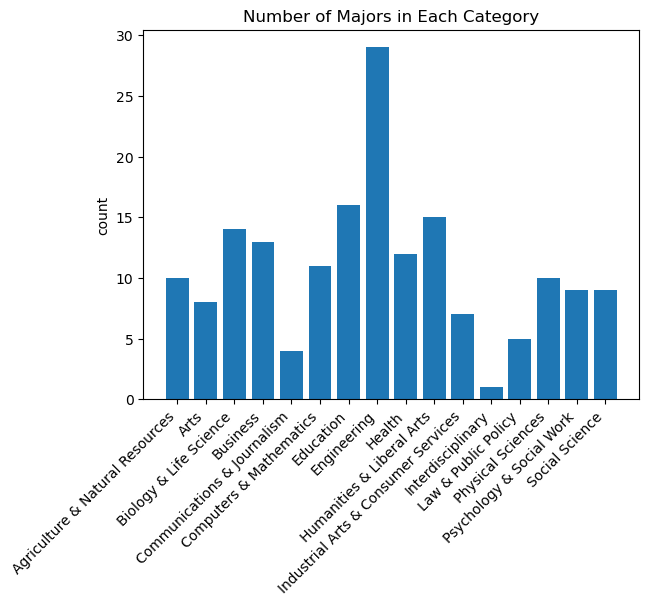

In [6]:
plt.bar(data=categories, x="Major_category", height="Number of Majors" , label="Major_category")
plt.title("Number of Majors in Each Category")
plt.xticks(rotation=45, ha="right")
plt.ylabel("count")
plt.legend(bbox_to_anchor=(1, 1)).remove()

We can observe that the engineering category has the most majors, followed by a large group of categories that have about the same counts. The interdisciplinary, law, and communications categories have the least majors.

In [7]:
mjrs = majors[["Major", "Major_category", "Total", "ShareWomen", "Unemployment_rate", "Median"]] 
mjrs

,Major,Major_category,Total,ShareWomen,Unemployment_rate,Median
0,PETROLEUM ENGINEERING,Engineering,2339.0,0.120564,0.018381,110000
1,MINING AND MINERAL ENGINEERING,Engineering,756.0,0.101852,0.117241,75000
2,METALLURGICAL ENGINEERING,Engineering,856.0,0.153037,0.024096,73000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258.0,0.107313,0.050125,70000
4,CHEMICAL ENGINEERING,Engineering,32260.0,0.341631,0.061098,65000
...,...,...,...,...,...,...
168,ZOOLOGY,Biology & Life Science,8409.0,0.637293,0.046320,26000
169,EDUCATIONAL PSYCHOLOGY,Psychology & Social Work,2854.0,0.817099,0.065112,25000
170,CLINICAL PSYCHOLOGY,Psychology & Social Work,2838.0,0.799859,0.149048,25000
171,COUNSELING PSYCHOLOGY,Psychology & Social Work,4626.0,0.798746,0.053621,23400


Text(0.5, 1.0, 'Median Income vs Percentage of Women for Each Major')

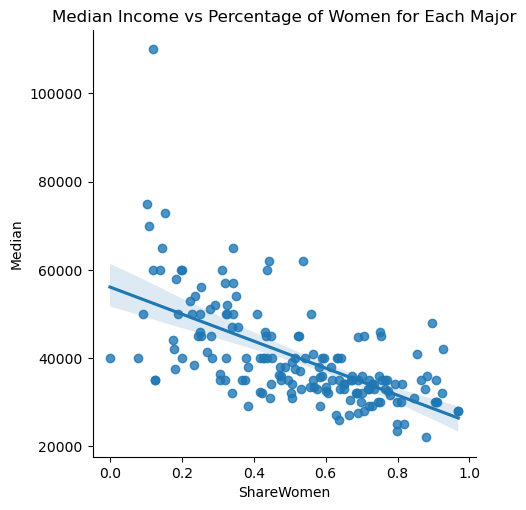

In [8]:
sns.lmplot(data=mjrs, x="ShareWomen", y="Median")
plt.title("Median Income vs Percentage of Women for Each Major")

It seems that there is a correlation between the percentage of women in a major and the median income. The graph shows that majors with a low percentage of women (male-dominated fields) have a higher pay, while majors with a high percentage of women (female-dominated fields) have a lower pay. Is there a trend between these majors (i.e. are the majors in a certain area of the graph all from the same major category)?

Text(0.5, 1.0, 'Median Income vs Percentage of Women for Each Major, Colorcoded')

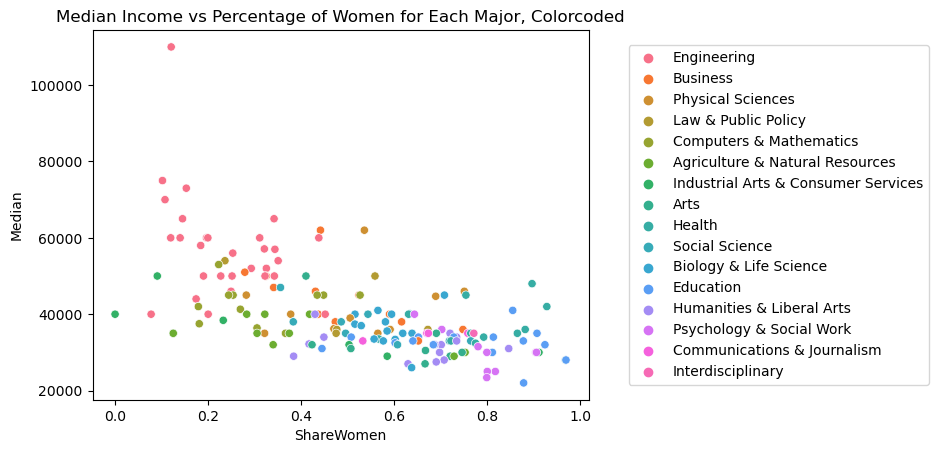

In [9]:
scatter = sns.scatterplot(data=mjrs, x="ShareWomen", y="Median", hue="Major_category")
scatter.legend(loc='center right', bbox_to_anchor=(1.7, 0.5), ncol=1)
plt.title("Median Income vs Percentage of Women for Each Major, Colorcoded")

In [10]:
engind = majors[(majors["Major_category"]=="Engineering") | 
                (majors["Major_category"]=="Industrial Arts & Consumer Services")]
engind.head(5) #[["Major", "Major_category", "ShareWomen", "Median"]].sort_values(by=["ShareWomen"])

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Most of the dots on the left side of the graph (lowest share of women, highest median income) seem to come from majors that typically have high wages like Engineering and Industrial Arts. Why would women avoid jobs like engineering if they have such a high pay? One main reason for this outcome may be because these two categories are often seen as masculine jobs (especially industrial art like metal working and car manufacturing/repair). The fear of judgement and/or harassment from male peers may also cause women to want to avoid engineering. Is there any other reason though -- one that we could find from our data?

# Part 2: Grad Students 

In [11]:
grad = pd.read_csv("grad-students.csv")
grad.shape

(173, 22)

In [12]:
majors.shape

(173, 21)

In [13]:
grad[pd.isnull(grad).any(axis=1)]

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium


No rows contain NaN values!

My theory is that women tend to avoid grad school and most jobs in engineering require one to go to grad school, which is why there is such a low share of women. Since many women give birth and usually are the one to take care of the children, they may not consider going to grad school, especially if they already have a job (and have to work both at home and at their job).

In [14]:
grad.head(5)

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


In [15]:
grad["Grad School Rate"] = grad["Grad_total"]/(grad["Nongrad_total"]+grad["Grad_total"])
grad[["Major", "Major_category", "Grad_total", "Nongrad_total", "Grad School Rate"]]

,Major,Major_category,Grad_total,Nongrad_total,Grad School Rate
0,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,86062,0.096320
1,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,461977,0.104420
2,HOSPITALITY MANAGEMENT,Business,24417,179335,0.119837
3,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,37575,0.125878
4,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,53819,0.144753
...,...,...,...,...,...
168,COUNSELING PSYCHOLOGY,Psychology & Social Work,51812,16781,0.755354
169,CLINICAL PSYCHOLOGY,Psychology & Social Work,22716,6519,0.777014
170,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,114971,26320,0.813718
171,SCHOOL STUDENT COUNSELING,Education,19841,2232,0.898881


In [16]:
grad.groupby("Major_category").agg("median")["Grad School Rate"].sort_values(ascending=False)

Major_category
Biology & Life Science                 0.616107
Education                              0.513022
Physical Sciences                      0.484751
Psychology & Social Work               0.472469
Humanities & Liberal Arts              0.461052
Health                                 0.415766
Engineering                            0.388144
Social Science                         0.373895
Law & Public Policy                    0.350638
Agriculture & Natural Resources        0.299200
Arts                                   0.262546
Interdisciplinary                      0.259910
Computers & Mathematics                0.258323
Business                               0.226693
Communications & Journalism            0.206593
Industrial Arts & Consumer Services    0.184368
Name: Grad School Rate, dtype: float64

The grad school rate (percentage of students that go to grad school) for engineering is about 38.8% and about 18.4% for Industrial Arts and Consumer Services. This is surprising and contrary to my hypothesis that engineering and industrial arts majors go to graduate school. Therefore, the hypothesis that women avoid engineering and industrial arts to avoid going to grad school is not true. There is some other set of factors that are associated with women not majoring in engineering and industrial arts.